<a href="https://colab.research.google.com/github/nafiz512/Deep-Learning/blob/main/suicidal_ideatation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji --quiet

In [ ]:
import pandas as pd
import numpy as np
import re88
import emoji
import string
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM,GRU,Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Capstone /suicidal_nonsuicidal_Dataset.csv')

In [ ]:
df.head()

,post,class
0,আমি আপনার থেকে আরো বেশিদিন এই নরক যন্তনা ভোগ ...,1
1,"_ এই যে ম্যাডাম, কয়টায় আসার কথা ছিল? _ আরে স...",0
2,_ প্রতিটা মেয়ে তার বাবার কাছে রাজকন্যা- _ অনে...,0
3,_ ভালোবাসি সবসময় শুধু তোমাকে'ই ভালোবাসি!'💝🌸,0
4,_ সংসারের দায়িত্ব যখন মায়ের হাতে_ _ অনেক ভাল...,0


In [ ]:
df.shape


(7130, 2)

In [ ]:
df.value_counts(df["class"])

,count
class,
1,3620
0,3510


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(7128, 2)

In [ ]:
df.groupby("class").describe()

post                                                               
      count unique                                                top freq
class                                                                     
0      3510   3510  প্রতিনিয়ত আপনার নতুন নতুন খাবারের ভিডিও গুলোত...    1
1      3618   3618  আসসালামু আলাইকুম। রাশিদুল হক স্যার আমি আপনার এ...    1

In [ ]:
longest_string = max(df["post"], key=len)
print(len(longest_string))

5920


In [ ]:
import nltk
from bs4 import BeautifulSoup
import re,string,unicodedata

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', ' ', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['post']=df['post'].apply(denoise_text)

In [ ]:
#remove special character
def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r' ', text)
#remove non bangla character
def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Z]', flags=re.I)
    return pattern.sub(r' ', text)
#remove non empticons character
def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

#remove noise
def Remove_text(text):
    text = rem_special_characters(text)
    text = rem_non_bangla_characters(text)
    text = rem_emoticons(text)
    return text
#Apply function on description column
df['post']=df['post'].apply(Remove_text)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

bangla_stopwords = set(stopwords.words('bengali'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(bangla_stopwords)

{'হল', 'করবেন', 'যাঁরা', 'এতটাই', 'কখনও', 'পাওয়া', 'যেমন', 'কয়েকটি', 'হাজার', 'নয়', 'করলেন', 'দিতে', 'ছাড়া', 'ওরা', 'সঙ্গে', 'জন্যওজে', 'গোটা', 'এক্', 'শুরু', 'আমার', 'সেখানে', 'ওদের', 'রয়েছে', 'যার', 'পেয়্র্', 'সহিত', 'নাগাদ', 'ওর', 'যাওয়া', 'হচ্ছে', 'আবার', 'এখনও', 'তাও', 'সে', 'হয়েই', 'গুলি', 'বলেছেন', 'আগেই', 'করাই', 'তাই', 'ছাড়াও', 'ই', 'তুমি', 'দেন', 'নাই', 'বলতে', 'আমাদের', 'তারা', 'থাকবেন', 'অবশ্য', 'হলেও', 'আদ্যভাগে', 'দেখে', 'সেটাও', 'উত্তর', 'হলে', 'দিকে', 'উচিত', 'নিতে', 'এ', 'এস', 'আমরা', 'নানা', 'তাদের', 'থাকায়', 'মধ্যেও', 'মোটেই', 'নেই', 'উপর', 'নিজে', 'মোট', 'বদলে', 'যাচ্ছে', 'নিজেদের', 'চালু', 'আজ', 'অনেকে', 'হবেন', 'যদি', 'হয়েছেন', 'বসে', 'দেওয়ার', 'সাধারণ', 'করি', 'পরে', 'চার', 'কেখা', 'ভাবে', 'কেউই', 'একবার', 'দ্বারা', 'পারি', 'সমস্ত', 'দিন', 'নেওয়া', 'এমনকী', 'এতে', 'প্রতি', 'ফের', 'এটি', 'দিলেন', 'অনুযায়ী', 'এখন', 'সম্প্রতি', 'হলেই', 'এমনি', 'বন', 'কয়েক', 'অতএব', 'যথেষ্ট', 'বহু', 'না', 'পর', 'নিজেই', 'চান', 'বক্তব্য', 'আরও', 'সেখান', 'বললেন', 'দুটো', '

In [ ]:
stop_words = { "অবশ্য" ,"অনেক","অনেকে","অনেকেই","অন্তত","অথবা","অথচ","অর্থাত","অন্য","আজ","আছে","আপনার","আপনি","আবার","আমরা"
"আমাকে","আমাদের","আমার","আমি","আরও","আর","আগে","আগেই","আই","অতএব","আগামী","অবধি","অনুযায়ী","আদ্যভাগে","এই","একই","একে",
"একটি","এখন","এখনও","এখানে","এখানেই","এটি","এটা","এটাই","এতটাই","এবং","একবার","এবার","এদের","এঁদের","এমন","এমনকী","এল","এর","এরা",
"এঁরা","এস","এত","এতে","এসে","একে","এ","ঐ","ই","ইহা","ইত্যাদি","উনি","উপর","উপরে","উচিত","ও","ওই","ওর","ওরা","ওঁর","ওঁরা","ওকে","ওদের",
"ওঁদের","ওখানে",'কত',"কবে",'করতে',"কয়েক","কয়েকটি","করবে","করলেন","করার","কারও","করা","করি","করিয়ে","করার","করাই","করলে","করলেন",
"করিতে","করিয়া","করেছিলেন","করছে","করছেন","করেছেন","করেছে","করেন","করবেন","করায়","করে","করেই","কাছ","কাছে","কাজে","কারণ","কিছু",
"কিছুই","কিন্তু","কিংবা","কি","কী","কেউ","কেউই","কাউকে","কেন","কে","কোনও","কোনো","কোন","কখনও","ক্ষেত্রে","খুব","গুলি","গিয়ে","গিয়েছে","গেছে",
"গেল","গেলে","গোটা","চলে","ছাড়া","ছাড়াও","ছিলেন","ছিল","জন্য","জানা","ঠিক","তিনি","তিনঐ","তিনিও","তখন","তবে","তবু","তাঁদের","তাঁহারা","তাঁরা",
"তাঁর","তাঁকে","তাই","তেমন","তাকে","তাহা","তাহাতে","তাহার","তাদের","তারপর","তারা","তারৈ","তার","তাহলে","তিনি","তা","তাও","তাতে","তো","তত",
"তুমি","তোমার","তথা","থাকে","থাকা","থাকায়","থেকে","থেকেও","থাকবে","থাকেন","থাকবেন","থেকেই","দিকে","দিতে","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন",
"দু","দুটি","দুটো","দেয়","দেওয়া","দেওয়ার","দেখা","দেখে","দেখতে","দ্বারা","ধরে","ধরা","নয়","নানা","না","নাকি","নাগাদ","নিতে","নিজে","নিজেই","নিজের",
"নিজেদের","নিয়ে","নেওয়া","নেওয়ার","নেই","নাই","পক্ষে","পর্যন্ত","পাওয়া","পারেন","পারি","পারে","পরে","পরেই","পরেও","পর","পেয়ে","প্রতি","প্রভৃতি",
"প্রায়","ফের","ফলে","ফিরে","ব্যবহার","বলতে","বললেন","বলেছেন","বলল","বলা","বলেন","বলে","বহু","বসে","বার","বা","বিনা","বরং","বদলে","বাদে","বার",
"বিশেষ","বিভিন্ন","বিষয়টি","ব্যবহার","ব্যাপারে""ভাবে","ভাবেই","মধ্যে","মধ্যেই","মধ্যেও","মধ্যভাগে","মাধ্যমে","মাত্র","মতো","মতোই","মোটেই","যখন","যদি",
"যদিও","যাবে","যায়","যাকে","যাওয়া","যাওয়ার","যত","যতটা","যা","যার","যারা","যাঁর","যাঁরা","যাদের","যান","যাচ্ছে","যেতে","যাতে","যেন","যেমন","যেখানে",
"যিনি","যে","রেখে","রাখা","রয়েছে","রকম","শুধু","সঙ্গে","সঙ্গেও","সমস্ত","সব","সবার","সহ","সুতরাং","সহিত","সেই","সেটা","সেটি","সেটাই","সেটাও","সম্প্রতি",
"সেখান","সেখানে","সে","স্পষ্ট","স্বয়ং","হইতে","হইবে","হৈলে","হইয়া","হচ্ছে","হত","হতে","হতেই","হবে","হবেন","হয়েছিল","হয়েছে","হয়েছেন","হয়ে","হয়নি",
"হয়","হয়েই","হয়তো","হল","হলে","হলেই","হলেও","হলো","হিসাবে","হওয়া","হওয়ার","হওয়ায়","হন","হোক","জন","জনকে","জনের","জানতে","জানায়",
"জানিয়ে","জানানো","জানিয়েছে","জন্য","জন্যওজে","জে","বেশ","দেন","তুলে","ছিলেন","চান","চায়","চেয়ে","মোট","যথেষ্ট",
"টি"}

In [ ]:
!pip install bnltk --quiet

from bnltk.stemmer import BanglaStemmer

stemmer = BanglaStemmer()

In [ ]:
def clean_text(text):
    # Remove emojis
    text = emoji.replace_emoji(text, replace=' ')
    # Remove punctuation and digits
    text = re.sub(r'[^\u0980-\u09FF\s]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    tokens = text.split()
    #Removing stop words
    tokens = [word for word in tokens if word not in bangla_stopwords]
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['post'] = df['post'].astype(str).apply(clean_text)

In [ ]:
df.head()

,post,class
0,আরো বেশিদিন নরক যন্তনা ভোগ কর সারাক্ষন ভ ভ থাক...,1
1,ম্যাডাম কয়টায় আস কথা আর সরি সরি এভাব রাগ কর ...,0
2,প্রতি মেয় বাব রাজকন্যা ভালোবাসি বাবা তোমায়,0
3,ভালোবাসি সবসম তোমা ভালোবাসি,0
4,সংসার দায়িত্ব মায় হা ভালোবাসি মা,0


In [ ]:
df['post'][0]

'আরো বেশিদিন নরক যন্তনা ভোগ কর সারাক্ষন ভ ভ থাকি কখন সমস্যা তীব্র যাক ভা ভ পা মহান রাব্বুল আলামিন পরীক্ষা নিচ্ছ'

In [ ]:
longest_string = max(df["post"], key=len)
print(len(longest_string))

3704


In [ ]:
longest_string

'ফরিদপুর জেলা ফরিদপুর বাংলাদেশ মধ্যাঞ্চল ঢাকা বিভাগ প্রস্তাবিত পদ্মা বিভাগ জেলা উপজেল সংখ্যানুসার ফরিদপুর বাংলাদেশ শ্রেণীভুক্ত জেলা ফরিদপুর জেল প্রতিষ্ঠা ১৭৮৬ সাল মতান্তর ১৮১৫ সাল জেল ব্র্যান্ডিং স্লোগান হলো সোনা আঁশ ভরপুর ভালোবাসি ফরিদপুর ফরিদপুর জেল ফরিদপুর পৌরসভা বাংলাদেশ ৪র্থ তম বৃহত্তম পৌরসভা ফরিদপুর শহর দেশ ১৪তম বৃহত্তম শহর ফরিদপুর জেলা ফরিদপুর নামকরণ এখানক প্রখ্যাত সুফি সাধক শাহ শেখ ফরিদুদ্দিন নামানুসার পূর্বনাম ফতেহাবাদ একসম জেলা জালালপুর নামে ডাকা হ ফরিদপুর জেলা ফরিদপুর জেল আয়তন ২০৭২ ৭২ বর্গ কিলোমি ঢাকা জেল দূরত্ব ১১৯ কিলোমি জেল উত্তর রাজবাড়ী জেলা মানিকগঞ্জ জেলা দক্ষিণ গোপালগঞ্জ জেলা জেলা পশ্চিম মাগু জেলা নড়াইল জেলা পূর্ব ঢাকা জেলা মাদারীপুর জেলা মুন্সীগঞ্জ জেলা জেলা অবস্থিত ফরিদপুর জেলা ফরিদপুর জেলায় পৌরসভা ৬ উপজেলা ৯ ২১১ ২১৪ ৪ সংসদী আসন জেল উপজেলা ফরিদপুর সদর বোয়ালমারী আলফাডাঙ্গা মধুখালী ভাঙ্গা নগরকান্দা চরভদ্রাসন সদরপুর সালথা উপজেলা ২০২২ সাল জনশুমারী গৃহগণনা প্রতিবেদন জেল জনসংখ্যা ২১ ৬২ ৮৭৬ শিক্ষ হ ৭১ ৯৯ শতাংশ জেল উল্লেখযোগ্য শিক্ষাপ্রতিষ্ঠান সরকারি রাজেন্দ্র কলেজ ফরি

In [ ]:
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['post'].values)
X = tokenizer.texts_to_sequences(df['post'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
y = df['class'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Word index:", tokenizer.word_index)
print("Word index length:", len(tokenizer.word_index))

Word index: {'কথা': 1, 'এক': 2, 'সাথ': 3, 'ভালো': 4, 'মা': 5, 'সমস্যা': 6, 'মানুষ': 7, 'লাগ': 8, 'ভালোবাসি': 9, 'আস': 10, 'সম': 11, 'বছর': 12, 'মন': 13, 'ব': 14, 'বাবা': 15, 'খারাপ': 16, 'যা': 17, 'জীবন': 18, 'পা': 19, 'মানসিক': 20, 'পার': 21, 'চা': 22, 'কর': 23, 'একটু': 24, 'বল': 25, 'পড়': 26, 'কষ্ট': 27, 'মাঝ': 28, 'বি': 29, 'থাক': 30, 'মাথা': 31, 'একজন': 32, 'চিন্তা': 33, 'নাজা': 34, 'কিভাব': 35, 'তোমা': 36, 'ভুল': 37, 'ঘুম': 38, 'আ': 39, 'বুঝ': 40, 'সবা': 41, 'কখনো': 42, 'চোখ': 43, 'নি': 44, 'থাকি': 45, 'দি': 46, 'এসব': 47, 'ভ': 48, 'কারো': 49, 'ভা': 50, 'এ': 51, 'শেষ': 52, 'মাস': 53, 'হ': 54, 'বাসা': 55, 'ছোট': 56, 'জানি': 57, 'বয়স': 58, 'বড়': 59, 'আপনা': 60, 'একা': 61, 'হাত': 62, 'খা': 63, 'কারন': 64, 'উঠ': 65, 'রাগ': 66, 'ছালা': 67, 'মুখ': 68, 'রাখ': 69, 'করবো': 70, 'সম্পর্ক': 71, 'ছিলো': 72, 'বিয়': 73, '২': 74, 'অবস্থা': 75, 'কেমন': 76, 'শুন': 77, 'করে': 78, 'পারিনা': 79, 'মত': 80, 'ভালোবাস': 81, 'দেখি': 82, 'ভালোবাসা': 83, 'আসল': 84, 'বাড়ি': 85, 'টাকা': 86, 'পরিবার': 87, 'মান'

In [ ]:
print(tokenizer.word_index['রাশিদুল'])

27073


In [ ]:
import numpy as np

# Masks
suicidal_mask = (y == 1)
non_suicidal_mask = (y == 0)

# Select sequences
X_suicidal = X[suicidal_mask]
X_non_suicidal = X[non_suicidal_mask]

# Flatten and remove padding (token ID 0)
suicidal_tokens = X_suicidal.flatten()
suicidal_tokens = suicidal_tokens[suicidal_tokens != 0]

non_suicidal_tokens = X_non_suicidal.flatten()
non_suicidal_tokens = non_suicidal_tokens[non_suicidal_tokens != 0]

# Get unique tokens
unique_suicidal_tokens = np.unique(suicidal_tokens)
unique_non_suicidal_tokens = np.unique(non_suicidal_tokens)

print(f"Number of unique suicidal tokens: {len(unique_suicidal_tokens)}")
print(f"Number of unique non-suicidal tokens: {len(unique_non_suicidal_tokens)}")


Number of unique suicidal tokens: 7783
Number of unique non-suicidal tokens: 7095


In [ ]:

# Load pretrained Bangla FastText vectors
embedding_index = {}
with open("/content/drive/MyDrive/Capstone /cc.bn.300.vec", encoding='utf-8') as f:
    next(f)  # skip the first line
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [ ]:
# Create embedding matrix
EMBEDDING_DIM = 300
word_index = tokenizer.word_index
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:

# Model: CNN + LSTM
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,000 (11.44 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,000,000 (11.44 MB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Train
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 61s 161ms/step - accuracy: 0.7641 - loss: 0.4594 - val_accuracy: 0.9037 - val_loss: 0.2247
Epoch 2/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 46s 143ms/step - accuracy: 0.9241 - loss: 0.1946 - val_accuracy: 0.8984 - val_loss: 0.2403
Epoch 3/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.9432 - loss: 0.1439 - val_accuracy: 0.8949 - val_loss: 0.2378
Epoch 4/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 83s 148ms/step - accuracy: 0.9564 - loss: 0.1238 - val_accuracy: 0.9037 - val_loss: 0.2378
Epoch 5/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 46s 143ms/step - accuracy: 0.9589 - loss: 0.1002 - val_accuracy: 0.9177 - val_loss: 0.2363
Epoch 6/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 45s 141ms/step - accuracy: 0.9684 - loss: 0.0830 - val_accuracy: 0.9124 - val_loss: 0.2449
Epoch 7/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 47s 147ms/step - accuracy: 0.9729 - loss: 0.0727 - val_accuracy: 0.9072 - val_loss: 0.2769
Epoch 8/20
321/321 ━━━━━━━━━━━━━━━━━━━━ 80s 142ms/step - accuracy: 0.9795 - loss: 0

In [ ]:
# Evaluate
y_pred = (model.predict(X_test)).astype(int)
print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       715
           1       1.00      0.02      0.04       711

    accuracy                           0.51      1426
   macro avg       0.75      0.51      0.36      1426
weighted avg       0.75      0.51      0.36      1426



In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9226 - loss: 0.3226
Test Accuracy: 0.9257


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       715
           1       1.00      0.02      0.04       711

    accuracy                           0.51      1426
   macro avg       0.75      0.51      0.36      1426
weighted avg       0.75      0.51      0.36      1426



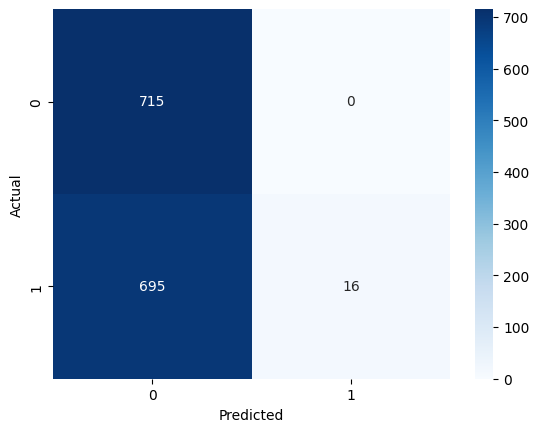

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_labels = (y_pred ).astype(int)

print(classification_report(y_test, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#model.save('suicide_prediction_cnn_lstm.h5')


In [ ]:
def predict_post(post_text):
    # Preprocess and tokenize like in training
    tokens = tokenizer.texts_to_sequences([post_text])
    padded = pad_sequences(tokens, maxlen=10000)
    prediction = model.predict(padded)[0][0]
    label = "Suicidal" if prediction > 0.95 else "Non-suicidal"
    return label, prediction

In [ ]:
predict_post("আসসালামুয়ালাইকুম। ইদানিং একটা সমস্যায় ভুগছি।অতীতের সব বাজে ঘটনাগুলো মনে করে সারাদিন ডিপ্রেস্‌ড হয়ে থাকি। আসলে আমি প্রাইমারি স্কুল থেকে হাই স্কুল পর্যন্ত প্রচুর বু*লিং এর শিকার হয়েছি। আমি দেখতে বাজে, এবং আমি খুব চুপচাপ থাকি এজন্য হয়ত। এমনকি আমার স্কুলের টিচার পর্যন্ত আমাকে পুরো ক্লাসের সামনে আমার দুর্বলতা নিয়ে মজা করেছিলেন একদিন। এসব সহ অনেক ঘটনা আছে যেগুলো মনে পড়লে অঝোরে কাঁদতে থাকি। পড়াশোনায়‌ ও মনোযোগ দিতে পারছি না। এবার অ্যাডমিশন ক্যান্ডিডেট ছিলাম। নিজের কিছু ভুলের কারণে কোনো ভার্সিটিতে চান্স পাইনি। ন্যাশনালেও আবেদন করি নাই। তাই 2nd টাইম দেওয়ার জন্য নতুন করে প্রস্তুতি নিচ্ছিলাম। তবে আশেপাশের মানুষ এবং আত্মীয় স্বজন অনেক সময় আমার আম্মুকে বলে এস‌এস‌সি এবং এইচএসসি জিপিএ ৫ পাওয়া ছেলে কোনো ভার্সিটিতে চান্স পাইনাই?তখন আবার কনফিডেন্স হারিয়ে ফেলি। সব মিলিয়ে সারাদিন খুব ডিপ্রেস্‌ড হয়ে থাকি। রাত হলে কাঁদতে কাঁদতে বুক ভাসিয়ে ফেলি।")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


('Suicidal', np.float32(0.99994206))

In [ ]:
predict_post("স্বাধীনতা'র ঘোষক, আধুনিক স্ব-নির্ভর বাংলাদেশে'র রুপকার, সার্ক'র প্রতিষ্ঠাতা, বাংলাদেশী জাতীয়তাবাদ দর্শন ও বহুদলীয় গণতন্ত্র পুনঃপ্রবক্তা, বাংলাদেশ জাতীয়তাবাদী দল-বিএনপির প্রতিষ্ঠিতা শহীদ প্রেসিডেন্ট জিয়াউর রহমান-এর ৪৪তম শাহাদাৎবার্ষিকী উপলক্ষ্যে বাংলাদেশ জাতীয়তাবাদী দল-বিএনপি’র উদ্যোগে রাজধানীর রমনাস্থ ইন্সটিটিউশন অব ইঞ্জিনিয়ার্স, বাংলাদেশ-আইইবি মিলনায়তনে আলোচনা সভা।")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


('Non-suicidal', np.float32(8.1877533e-07))